In [248]:
import defs
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
from scipy import constants
# from openpmd_viewer import OpenPMDTimeSeries
# from openpmd_viewer.addons import LpaDiagnostics

from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/Users/max/HiPACE/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')

# d = 'none'
# d = 'behindShort'
# d = 'behindLong'
d = 'frontLong'
# d = 'frontLongB'
# d = 'frontShort'
# d = 'frontShortB'

if d == 'none':
    r = False
else:
    r = True

p = f'/Users/max/HiPACE/recovery/filament/h5/{d}/'
ip = f'/Users/max/HiPACE/recovery/filament/insitu/{d}/'
data = defs.Functions(path = p, insitu_path = ip, n0 = 1e17, iteration = 0, normalized = True, recovery = r)

IA = constants.m_e * constants.c**3 / constants.e

# data.customCMAP()

In [249]:
print(f'(Quick) Energy Transfer Efficiency : {data.quickEfficiency(iteration = data.iteration):.2f} %')

(Quick) Energy Transfer Efficiency : 37.20 %


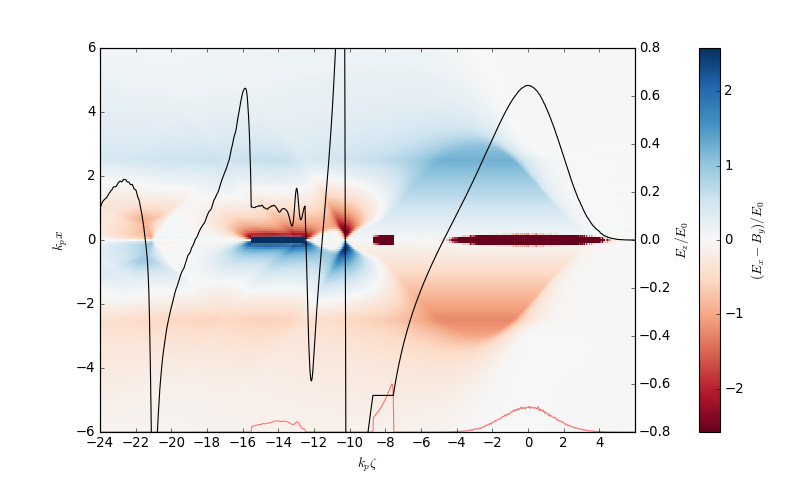

In [246]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.info.z, data.info.x, data.ExmBy.T, cmap = 'RdBu') #, vmin = -1, vmax = 1)

# plt.scatter(data.zd, data.xd, s = .02, color = 'darkred', label = '$e^-$ Drive Bunch')
# plt.scatter(data.zw, data.xw, s = .02, color = 'b', label = '$e^+$ Witness Bunch')
# plt.scatter(data.zr, data.xr, s = .02, color = 'g', label = '$e^-$ Recovery Bunch')

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
plt.plot(data.info.z, 1.5 * data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-34, 6)
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')
plt.xticks(np.arange(round(data.info.zmin), round(data.info.zmax), 2))

ax2 = plt.twinx()
ax2.plot(data.info.z, data.Ez, color = 'black')
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size = "4%", pad = .8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = .8)
cax3.remove()


cb2 = plt.colorbar(im, cax = cax2)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$(E_x - B_y)/E_0 $')

# plt.savefig('/Users/max/HiPACE/recovery/images/filamentFrontReco.png', dpi = 300, bbox_inches = 'tight')
plt.show()

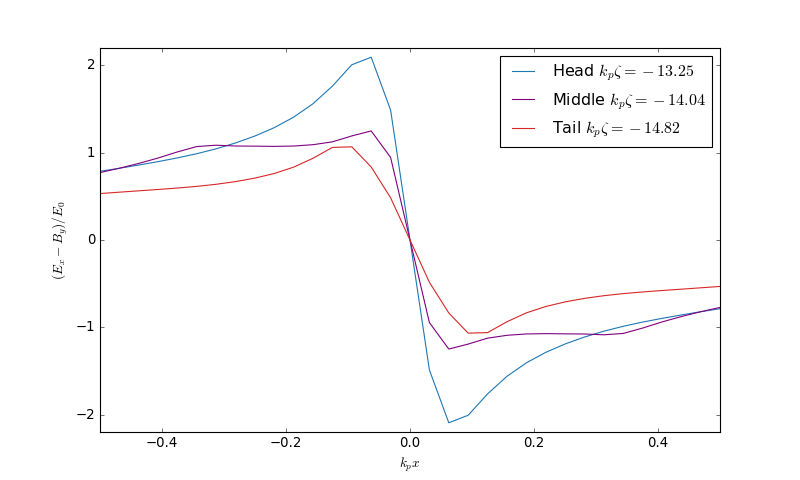

In [252]:
zAx = diag.z_axis(data.driveInsitu)
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]
# print(zAx[612:734])
kpz = -15.65 # -14.14160156 # -15.125
choice = np.argmin(np.abs(zAx - kpz))
head = np.argmin(np.abs(zAx - max(beam)))
tail = np.argmin(np.abs(zAx - min(beam)))
mid = head - (head - tail)//2
# idx = np.argmin(np.abs(zAx-kpz))
# print(idx, zAx[idx])

# WFSlice = data.ts.get_field(field = 'ExmBy', iteration = data.iteration, slice_across = 'z', slice_relative_position = (kpz + abs(data.info.z[len(data.info.z)//2]))/((data.info.zmax - data.info.zmin)/2))[0]

plt.close()
plt.figure(figsize = (10, 6))
# plt.plot(data.info.x, WFSlice, 'k', linewidth = 2)
plt.plot(data.info.x, data.ExmBy[head], 'tab:blue', ls = '-', label = f'Head $k_p\zeta = {zAx[head]:.2f}$')
plt.plot(data.info.x, data.ExmBy[mid], 'purple', ls = '-', label = f'Middle $k_p\zeta = {zAx[mid]:.2f}$')
plt.plot(data.info.x, data.ExmBy[tail], 'tab:red', ls = '-', label = f'Tail $k_p\zeta = {zAx[tail]:.2f}$')
# plt.plot(data.info.x, data.ExmBy[choice], 'm', ls = '-', label = f'$k_p\zeta = {zAx[choice]:.2f}$')
plt.ylabel('$(E_x-B_y)/E_0$')
plt.xlabel('$k_px$')
# plt.title(f'$k_p\zeta = {kpz}$')
plt.ylim(-2.2, 2.2)
# plt.xlim(data.info.xmin, data.info.xmax)
plt.xlim(-.5, .5)
plt.legend()
# plt.savefig('/Users/max/HiPACE/recovery/images/filamentFrontRecoTransverse.png', dpi = 300, bbox_inches = 'tight')
plt.show()

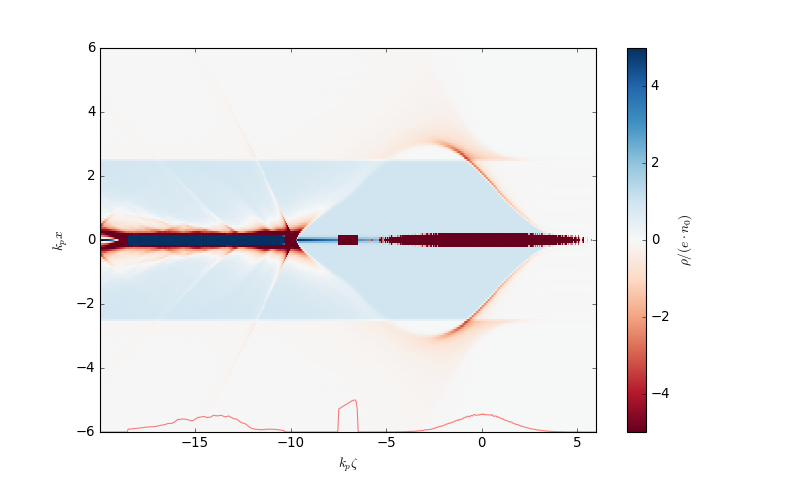

In [153]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
# im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'Blues_r', vmin = -5, vmax = 0)
im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'RdBu', vmin = -5, vmax = 5)

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e14, vmax = 1e14)
plt.plot(data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

# ax2 = plt.twinx()
# ax2.plot(data.info.z, data.Ez, color = 'black')
# ax2.set_ylim(-.8, .8)
# ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

# divider2 = make_axes_locatable(ax)
# cax2 = divider2.append_axes("right", size = "4%", pad = .8)
# divider3 = make_axes_locatable(ax2)
# cax3 = divider3.append_axes("right", size = "4%", pad = .8)
# cax3.remove()


cb2 = plt.colorbar(im)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$\rho/(e\cdot n_0)$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

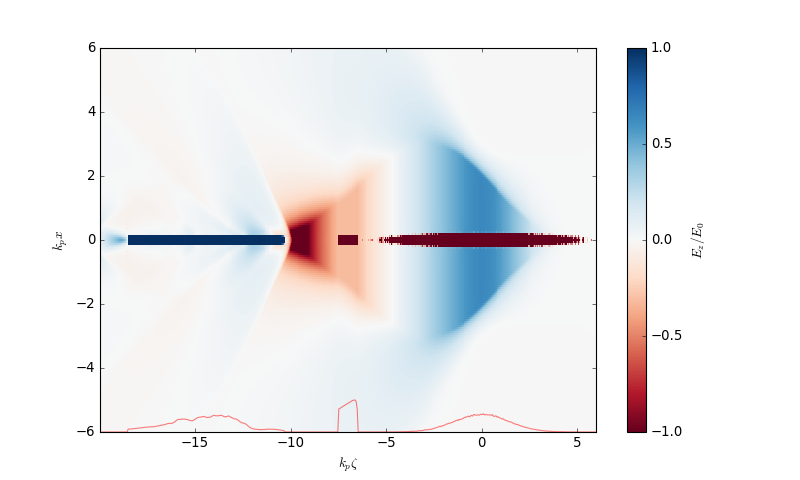

In [154]:
Ez = data.ts.get_field(field = 'Ez', iteration = data.iteration)[0]

plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.info.z, data.info.x, Ez.T, cmap = 'RdBu', vmin = -1, vmax = 1)

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e14, vmax = 1e14)
plt.plot(data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(im)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$E_z/E_0$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

-9.8056640625 -4.7373046875 -10.6552734375
[-23.63378906 -23.60449219 -18.47753906 -18.44824219 -18.41894531
 -12.29589844 -11.68066406  -4.73730469  -4.70800781]


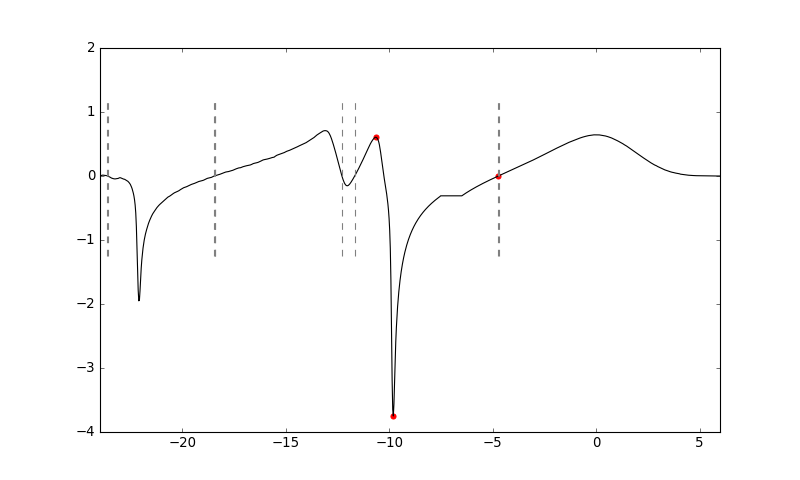

In [228]:
m = (data.info.z > -12) & (data.info.z < -9)
# m = (data.info.z > -23) & (data.info.z < -20)
recoveryPlacement = np.argmin(data.Ez[m])
wp = np.argmax(data.Ez[m])
minLoc = data.info.z[m][recoveryPlacement]
maxLoc = data.info.z[m][wp]
# mZero = (data.info.z > minLoc) & (data.info.z < 0)
mZero = (data.info.z > minLoc) & (data.info.z < 0)
zeroIdx = np.argmin(abs(data.Ez[mZero]))
zeroLoc = data.info.z[mZero][zeroIdx]
print(minLoc, zeroLoc, maxLoc)
# print(zeroLoc, minLoc)
print(data.info.z[(abs(data.Ez) < 5e-3) & (data.info.z < 0.)])

plt.close()
plt.figure(figsize = (10, 6))
plt.plot(data.info.z, data.Ez, color = 'k')
plt.scatter([minLoc, zeroLoc, maxLoc], [data.Ez[m][recoveryPlacement], data.Ez[mZero][zeroIdx], data.Ez[m][wp]], color = 'r')
# plt.hlines(0, data.info.z[0], data.info.z[-1], color = 'gray', linestyle = '-')
# plt.vlines([-13.25, -17.], -1, 1, color = 'gray', linestyle = '--')
plt.vlines(data.info.z[(abs(data.Ez) < 5e-3) & (data.info.z < 0.)], -1.25, 1.25, color = 'gray', linestyle = '--')
# plt.xticks(np.arange(data.info.zmin, data.info.zmax))
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(-1.25, 1.25)
plt.show()